In [ ]:
!pip install --upgrade pip
!pip install --upgrade setuptools


In [ ]:
!pip install charset-normalizer


In [ ]:
pip install requests


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import requests
import zipfile

In [ ]:
!pip install keras


In [ ]:
!pip install tensorflow
!pip install --upgrade tensorflow



In [ ]:
!pip install tensorflow
!pip install pandas
!pip install opencv-python
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install keras


In [ ]:
!pip install --upgrade seaborn


In [ ]:
!pip install --upgrade tqdm


In [ ]:
!pip install scikit-learn


In [ ]:
#Import the libraries
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
import pandas as pd
import glob, cv2
import numpy as np
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [ ]:
#Import Libraries
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
import keras
from keras import backend as K
from keras import layers
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint

In [ ]:
import pandas as pd

# Specify the file path with double backslashes
file_path = "C:\\Users\\jprup\\Desktop\\PROJECTS\\BE MPR\\HAM10000_metadata.csv"

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)
df

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear
...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face


In [ ]:
df.describe()

,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [ ]:
df['age'].isna().sum()

57

In [ ]:
# View the rows and columns presentation or the null values on the age column
df[df["age"].isna()]

,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown


In [ ]:
df['age'].fillna(df['age'].mean(), inplace = True)


C:\Users\jprup\AppData\Local\Temp\ipykernel_8320\3378826303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace = True)


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


C:\Users\jprup\AppData\Local\Temp\ipykernel_8320\560608484.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index, palette='Paired')
C:\Users\jprup\AppData\Local\Temp\ipykernel_8320\560608484.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_age, color='red');


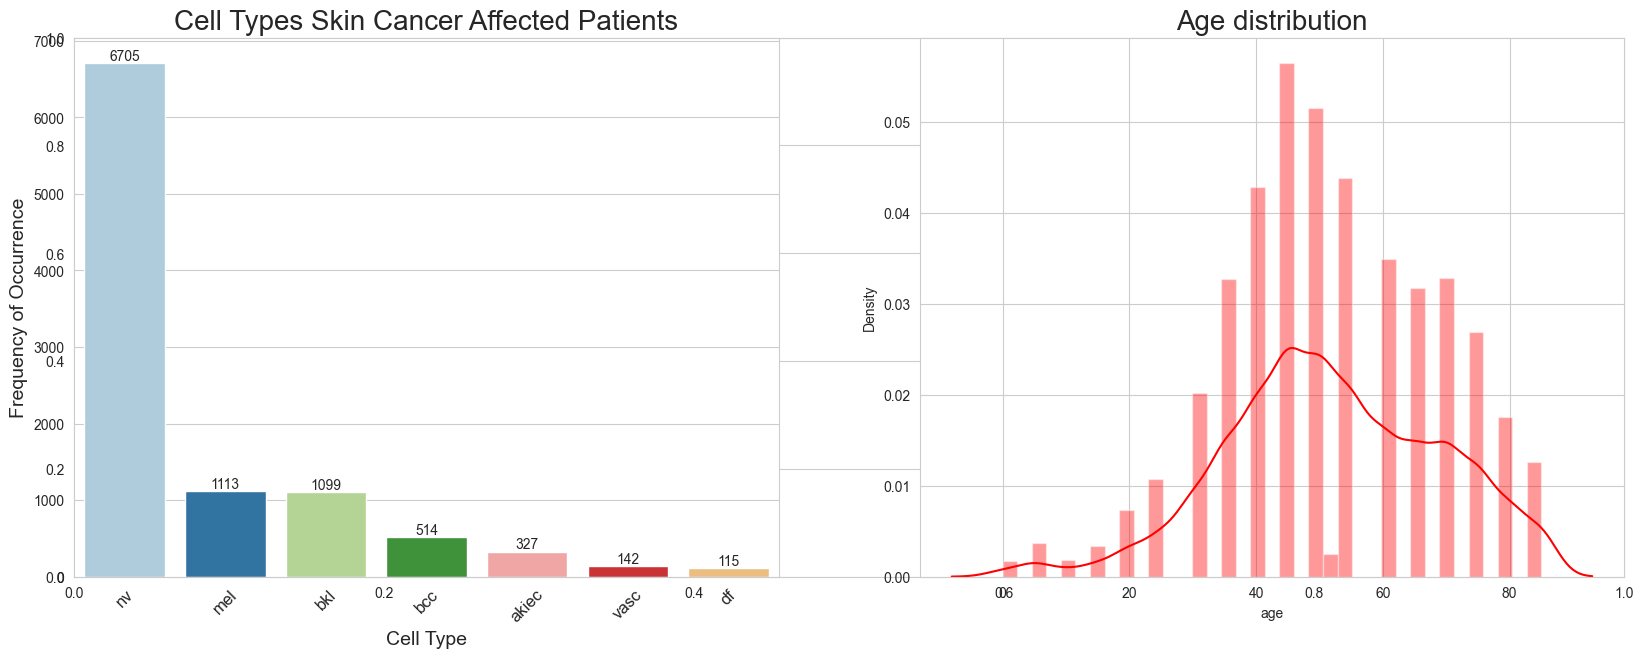

In [ ]:
# Set Seaborn style
sns.set_style('whitegrid')

# Cell Types Skin Cancer Affected Patients
fig, axes = plt.subplots(figsize=(20, 7))
ax1 = fig.add_subplot(121)
ax1 = sns.countplot(x='dx', data=df, order=df['dx'].value_counts().index, palette='Paired')
for container in ax1.containers:
    ax1.bar_label(container)
plt.title('Cell Types Skin Cancer Affected Patients', fontsize=20)
plt.xlabel('Cell Type', fontsize=14)
plt.ylabel('Frequency of Occurrence', fontsize=14)
plt.xticks(rotation=45, fontsize=12)

ax4 = fig.add_subplot(122)
sample_age = df['age']
sns.distplot(sample_age, color='red');
plt.title('Age distribution', fontsize=20)
#ax4.set_title('Age')

# Display the plot
plt.show()

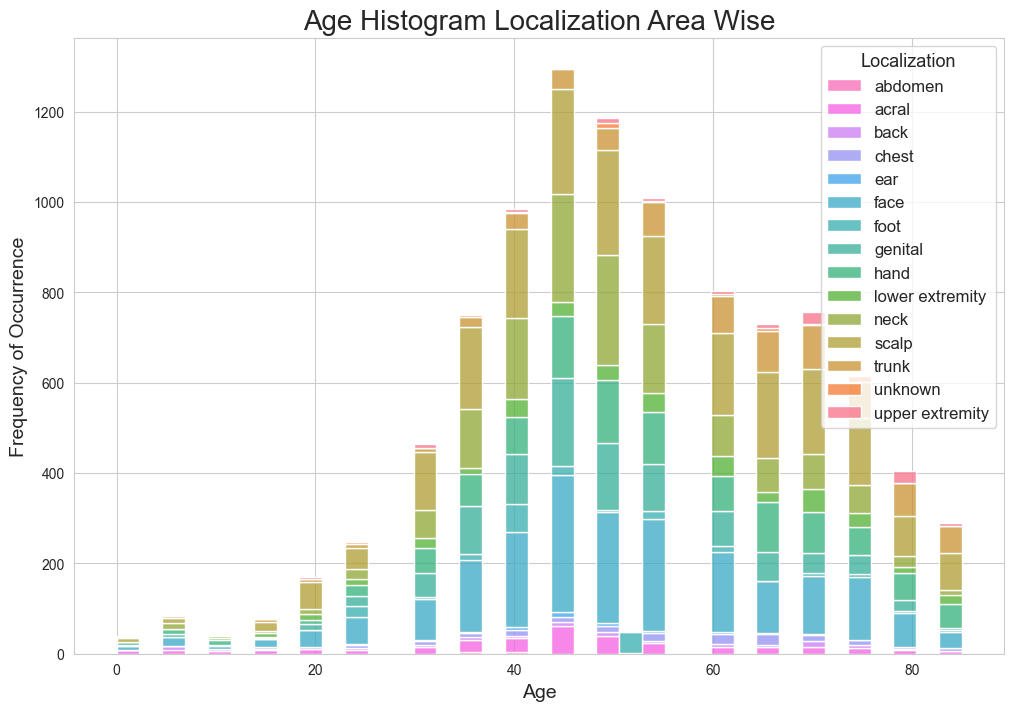

In [ ]:
sns.set_style('whitegrid')

# Age Histogram Localization Area Wise
fig, axes = plt.subplots(figsize=(12, 8))
ax = sns.histplot(data=df, x='age', hue='localization', multiple='stack')

# Add the legend
legend_labels = sorted(df['localization'].unique())
plt.legend(title='Localization', labels=legend_labels, title_fontsize='13', loc='upper right', fontsize='12')

plt.title('Age Histogram Localization Area Wise', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency of Occurrence', fontsize=14)

# Display the plot
plt.show()

In [ ]:
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [ ]:
df_new = df.iloc[:,[2, 6]]


In [ ]:
rafa = df_new.groupby("localization").value_counts().reset_index()


In [ ]:
rafa = rafa.rename(columns={0: "count"})


In [ ]:
# Get the data fram for the count of each lesion type, localization
nv = rafa[rafa["dx"] == "nv"]
mel = rafa[rafa["dx"] == "mel"]
bkl = rafa[rafa["dx"] == "bkl"]
vasc = rafa[rafa["dx"] == "vasc"]
bcc = rafa[rafa["dx"] == "bcc"]
akiec = rafa[rafa["dx"] == "akiec"]
dfi = rafa[rafa["dx"] == "df"]

C:\Users\jprup\AppData\Local\Temp\ipykernel_8320\710515611.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = "count",y = "localization",data = nv, palette='husl', order=nv.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
C:\Users\jprup\AppData\Local\Temp\ipykernel_8320\710515611.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x = "count",y = "localization",data = mel, palette='husl', order=mel.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
C:\Users\jprup\AppData\Local\Temp\ipykernel_8320\710515611.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.

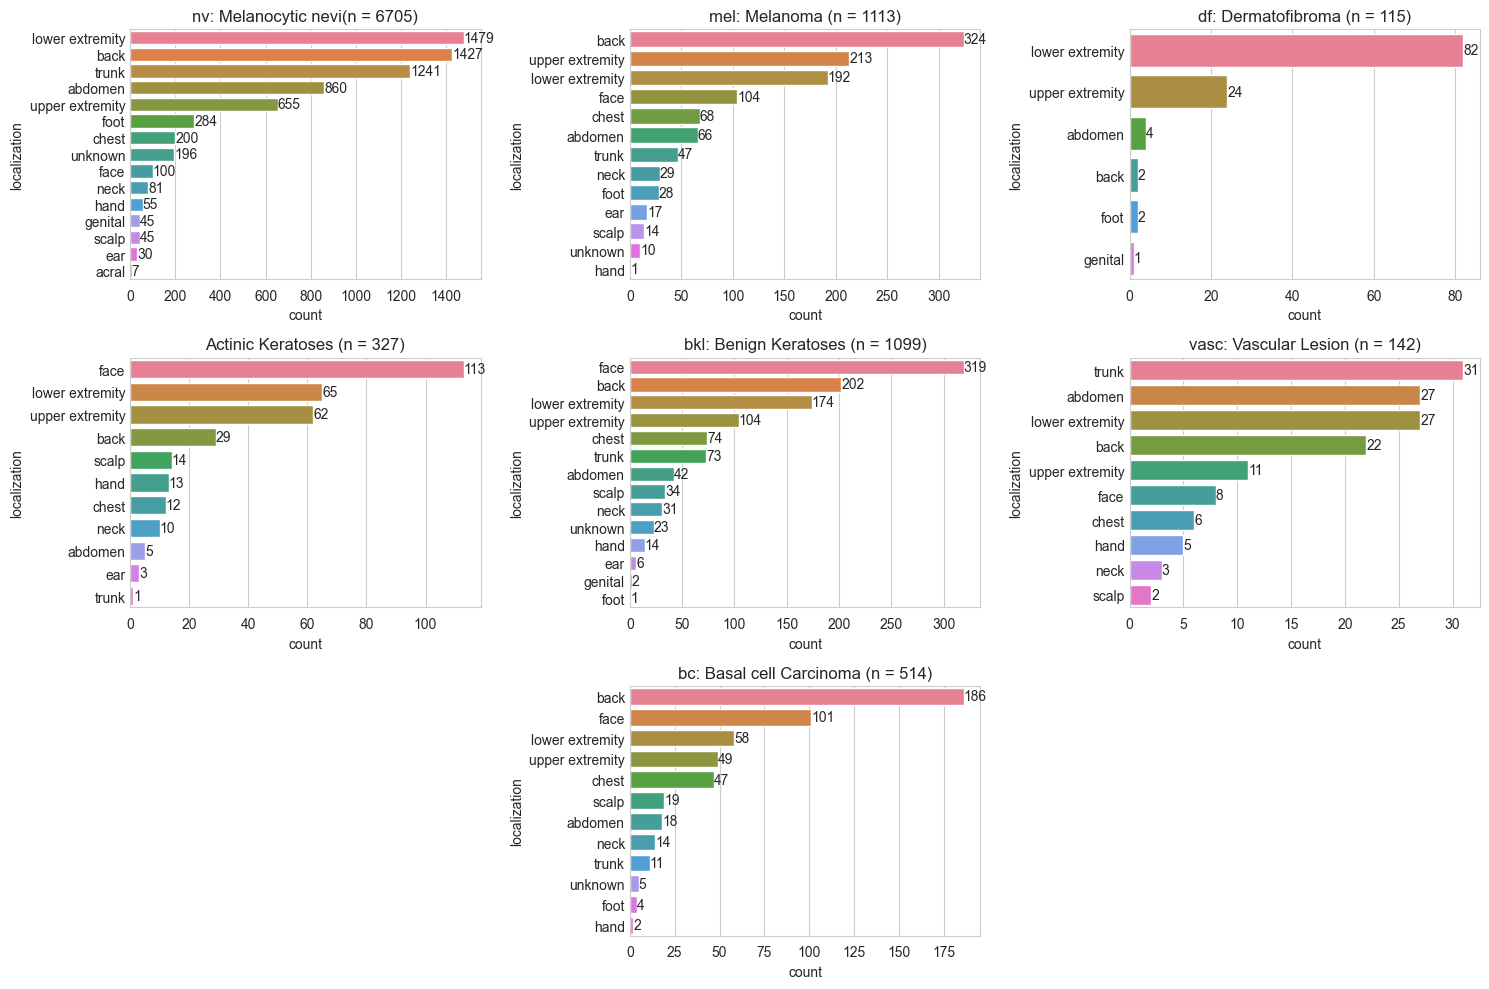

In [ ]:
# Getting a sense of the distribution of localization by diagnosis

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(331)
ax1 = sns.barplot(x = "count",y = "localization",data = nv, palette='husl', order=nv.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax1.containers:
    ax1.bar_label(i,)
ax1.tick_params(axis='y', length=0)
ax1.set_title('nv: Melanocytic nevi(n = 6705)')
plt.tight_layout();

ax2 = fig.add_subplot(332)
ax2 = sns.barplot(x = "count",y = "localization",data = mel, palette='husl', order=mel.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax2.containers:
    ax2.bar_label(i,)
ax2.tick_params(axis='y', length=0)
ax2.set_title('mel: Melanoma (n = 1113)')
plt.tight_layout();

ax3 = fig.add_subplot(333)
ax3 = sns.barplot(x = "count",y = "localization",data = dfi, palette='husl', order=dfi.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax3.containers:
    ax3.bar_label(i,)
ax3.tick_params(axis='y', length=0)
ax3.set_title('df: Dermatofibroma (n = 115)')
plt.tight_layout();


ax4 = fig.add_subplot(334)
ax4 = sns.barplot(x = "count",y = "localization",data = akiec, palette='husl', order=akiec.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax4.containers:
    ax4.bar_label(i,)
ax4.tick_params(axis='y', length=0)
ax4.set_title('Actinic Keratoses (n = 327)')
plt.tight_layout();

ax5 = fig.add_subplot(335)
ax5 = sns.barplot(x = "count",y = "localization",data = bkl, palette='husl', order= bkl.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax5.containers:
    ax5.bar_label(i,)
ax5.tick_params(axis='y', length=0)
ax5.set_title('bkl: Benign Keratoses (n = 1099)')
plt.tight_layout();

ax6 = fig.add_subplot(336)
ax6 = sns.barplot(x = "count",y = "localization",data = vasc, palette='husl', order= vasc.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax6.containers:
    ax6.bar_label(i,)
ax6.tick_params(axis='y', length=0)
ax6.set_title('vasc: Vascular Lesion (n = 142)')
plt.tight_layout();

ax7 = fig.add_subplot(338)
ax7 = sns.barplot(x = "count",y = "localization",data = bcc, palette='husl', order= bcc.groupby('localization')['count'].agg('mean').sort_values(ascending=False).index)
for i in ax7.containers:
    ax7.bar_label(i,)
ax7.tick_params(axis='y', length=0)
ax7.set_title('bc: Basal cell Carcinoma (n = 514)')
plt.tight_layout();


plt.tight_layout()
plt.show()


In [ ]:
mela = df[df["dx"] == "mel"]
mel_fem = mela[mela["sex"] == "female"]
mel_male = mela[mela["sex"] == "male"]
print("Median age of female with Melanoma is ", mel_fem["age"].median())
print("Median age of male with Melanoma is ", mel_male["age"].median())

Median age of female with Melanoma is  55.0
Median age of male with Melanoma is  65.0


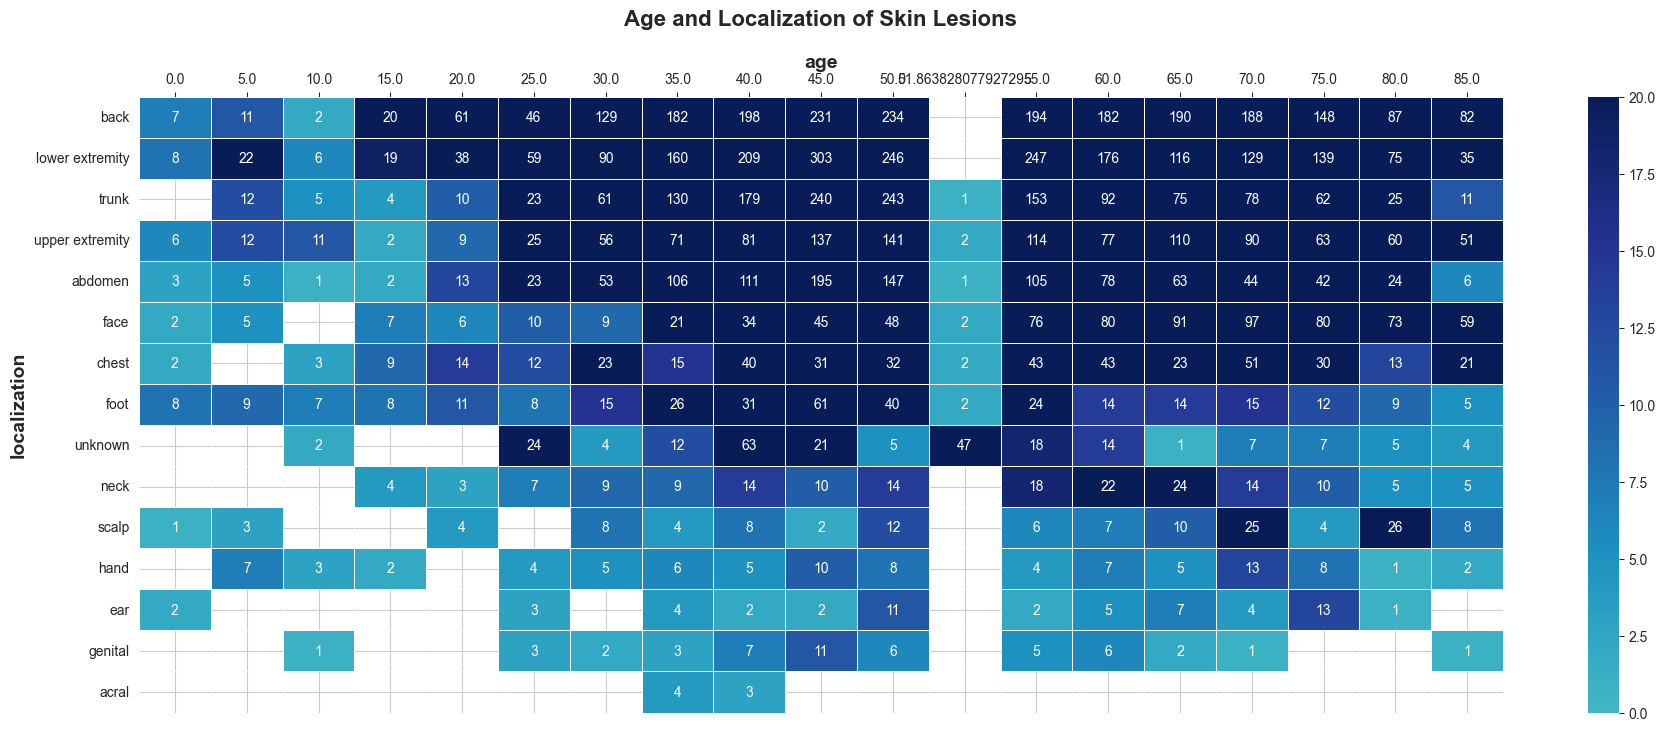

In [ ]:
# Heat Map Representation
skin_local = df.groupby(['localization']).size().sort_values(ascending=False, inplace=False).reset_index()
skin_local.columns = ['localization', 'count']
sort_by = skin_local['localization']

skin_local_age = df.groupby(['age','localization']).size().reset_index()
skin_local_age.columns = ['age', 'localization', 'count']
skin_local_age.sort_values( "count", ascending=False, inplace=True)

def heatmap(df, index,columns,values,vmax,sort_by,Title):
    df_wide = df.pivot(index=index, columns=columns, values=values)
    df_wide = df_wide.reindex(index=sort_by)
    plt.figure(figsize=(22,8))
    ax = sns.heatmap(df_wide, annot=True, fmt='.0f', yticklabels='auto', cmap=sns.color_palette("YlGnBu", as_cmap=True), center=.2,vmin = 0, vmax = vmax,linewidths=.5)
    ax.xaxis.tick_top() # x axis on top
    ax.xaxis.set_label_position('top')
    ax.set_xlabel(columns,fontsize = 14,weight = 'bold')
    ax.set_ylabel(index,fontsize = 14,weight = 'bold')
    ax.set_title(Title,fontsize = 16,weight = 'bold',pad=20)
    plt.show()

heatmap(skin_local_age,'localization', 'age','count', 20,sort_by,'Age and Localization of Skin Lesions')


In [ ]:
#Define the lesion names in a list
lesion_names = ['Melanocytic nevi','Melanoma','Benign keratosis-like lesions ',
               'Basal cell carcinoma','Actinic keratoses','Vascular lesions',
               'Dermatofibroma']

In [ ]:
lesion_img = df.groupby('lesion_id')['image_id']\
               .count()\
               .to_frame()

In [ ]:
# Encoding target values
lesion_type_dict = {
    'nv':'Melanocytic Nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'

}

In [ ]:
# Assign a numeric values to our target variables
lesion_ID_dict = {
    'nv': 0,
    'mel': 1,
    'bkl': 2,
    'bcc': 3,
    'akiec': 4,
    'vasc': 5,
    'df': 6
}

In [ ]:
# Create new columns named "cell_type" and "lesion_ID" to depict the ecoded target values
df['cell_type'] = df['dx'].map(lesion_type_dict.get)
df['lesion_ID'] = df['dx'].map(lesion_ID_dict.get)

In [ ]:
df

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,lesion_ID
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis,2
...,...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,abdomen,Actinic keratoses,4
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,face,Actinic keratoses,4


In [ ]:
import os
import glob

# Correct the path by enclosing it within quotes
path = r"C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM10000_images"

try:
    # Use raw string (r) to avoid interpreting backslashes as escape characters
    images_path = {os.path.splitext(os.path.basename(x))[0]: x for x in glob.glob(path + '/*.jpg')}
    print(len(images_path))
except Exception as e:
    print("Error:", e)


10015


In [ ]:
# Create a column for the path for each image.
df['path'] = df['image_id'].map(images_path.get)

In [ ]:
df.head()


,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,lesion_ID,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...


In [ ]:
num_unique_id = df["image_id"].nunique()

In [ ]:
print(f"There are {num_unique_id} unique image IDs in the dataset")


There are 10015 unique image IDs in the dataset


In [ ]:
y = df["lesion_ID"]


In [ ]:
y.head()


0    2
1    2
2    2
3    2
4    2
Name: lesion_ID, dtype: int64

In [ ]:
#Convert y to a float arrays
y = np.array(y)
print(y.shape)

(10015,)


In [ ]:
df["path"].head()


0    C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
1    C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
2    C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
3    C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
4    C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
Name: path, dtype: object

In [ ]:
# Define a function that reads and resizes the Images
def get_img(img_path):
  img = cv2.imread(img_path,1)
  img = cv2.resize(img,(71, 71))
  return img


In [ ]:
# Append the images from the path to
x = []
for img_name in tqdm(df['path'].values):
  x.append(get_img(img_name))

100%|██████████| 10015/10015 [02:11<00:00, 76.02it/s]


In [ ]:
#Convert x to float arrays and normalize it
x = np.array(x)/255
print(x.shape)

(10015, 71, 71, 3)


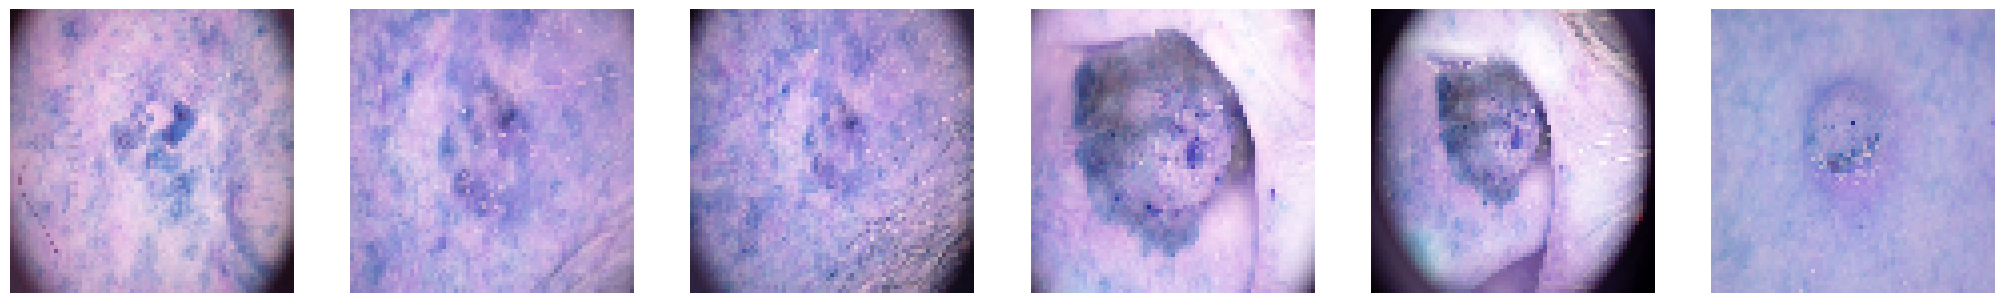

In [ ]:
from numpy.core.function_base import linspace
#Visualizing the train data set
plt.figure(figsize = (30, 15))
for i in range(1, 7, ):
    plt.subplot(1, 7, i)
    plt.imshow(x[i])
    #plt.title(lesion_names[np.argmax(y[i])])
    plt.axis("off")
plt.show()

In [ ]:
# Checking the dataframe info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           10015 non-null  float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
 7   cell_type     10015 non-null  object 
 8   lesion_ID     10015 non-null  int64  
 9   path          10015 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 782.6+ KB


In [ ]:
#View wthe first 5 elements of the dataset
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,cell_type,lesion_ID,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,Benign keratosis,2,C:\Users\jprup\Desktop\PROJECTS\BE MPR\HAM1000...


In [ ]:
# Splitting the data
#split the x and y into (x_train, x_test) and (y_train, y_test) respectively
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.10,random_state=28,stratify=y)

#split x_train and y_train into (x_train, x_val) and (y_train, y_val)
x_train,x_val,y_train,y_val =  train_test_split(x_train,y_train,test_size=0.10,random_state=28,stratify=y_train)

In [ ]:
#View the shape of the newly formed datasets
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8111, 71, 71, 3)
(902, 71, 71, 3)
(1002, 71, 71, 3)
(8111, 7)
(902, 7)
(1002, 7)


In [ ]:
y_idval = y_val


In [ ]:
#Make a copy of the y_train array
y_id = y_train
y_id

array([2, 0, 1, ..., 1, 0, 0], dtype=int64)

In [ ]:
# Make a copy of the y_test array
y_idtest = y_test
y_idtest

array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [ ]:
# One-Hot Encoding values
y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes =7)
y_val = to_categorical(y_val , num_classes=7)

In [ ]:
# print the shapes of the y variables
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(8111, 7)
(1002, 7)
(902, 7)


In [ ]:
#Check for dataset Balanceness
df['lesion_ID'].value_counts()
#We can see that the dataset is not balanced

lesion_ID
0    6705
1    1113
2    1099
3     514
4     327
5     142
6     115
Name: count, dtype: int64

In [ ]:
#from sklearn.utils.class_weight import compute_sample_weight
from sklearn.utils import class_weight

In [ ]:
# Define the class labels and their corresponding weights
class_labels = np.unique(df['dx'])
y = df["dx"]
class_weights = class_weight.compute_class_weight('balanced', classes = class_labels, y = y)
class_weights

array([ 4.37527304,  2.78349083,  1.30183284, 12.44099379,  1.28545758,
        0.21338021, 10.07545272])

In [ ]:
# Build a dictionary of the class_weight
class_weights = dict(zip([0,1,2,3,4,5,6], [4.37527304,  2.78349083,  1.30183284, 12.44099379,  1.28545758, 0.21338021, 10.07545272]))
class_weights


{0: 4.37527304,
 1: 2.78349083,
 2: 1.30183284,
 3: 12.44099379,
 4: 1.28545758,
 5: 0.21338021,
 6: 10.07545272}

In [ ]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.metrics import categorical_accuracy, top_k_categorical_accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPooling2D, Activation, Input, Reshape, Permute, concatenate, GlobalAveragePooling2D, AveragePooling2D, Multiply, Lambda
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.metrics import Recall
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import RMSprop
import shutil
from keras.applications.inception_v3 import InceptionV3


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import numpy as np

# Declare the filepath for the saved model
filepath = r"C:\Users\jprup\Desktop\PROJECTS\BE MPR\mpr_final.keras"  # Change "model_name.keras" to any desired filename

# Add an early stopping
early_stop = EarlyStopping(monitor='val_accuracy', patience=6, mode='auto', restore_best_weights=True)

# Reduce learning rate when a metric has stopped improving.
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=np.sqrt(0.1), patience=4, verbose=1, cooldown=0, mode='auto', min_delta=0.0001, min_lr=0.5e-6)

# Declare a checkpoint to save the best version of the model
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True,
                             mode='auto', save_weights_only=False)


In [ ]:
# Make a list of all the call_back methods
callbacks_list = [checkpoint, reduce_lr, early_stop]

In [ ]:
# Defining base model using Xception module from Keras
from keras.applications import Xception

training_shape = (71,71,3)
base_model = Xception(include_top=False,weights='imagenet',input_shape = training_shape)
for layer in base_model.layers:
    layer.trainable = True


In [ ]:
#Adding layers at end
n_classes = 7
model = base_model.output

model = Flatten()(model)

model = Dense(128)(model)
model = Dropout(0.5)(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)

output = Dense(n_classes, activation='softmax')(model)
model = Model(inputs=base_model.input, outputs=output)

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])


In [ ]:

# Model Summary
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 71, 71, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1        │ (None, 35, 35,    │        864 │ input_layer[0][0] │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_bn     │ (None, 35, 35,    │        128 │ block1_conv1[0][… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv1_act    │ (None, 35, 35,    │          0 │ block1_conv1_bn[… │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2        │ (None, 33, 33,    │     18,432 │ block1_conv1_act… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_bn     │ (None, 33, 33,    │        256 │ block1_conv2[0][… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1_conv2_act    │ (None, 33, 33,    │          0 │ block1_conv2_bn[… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1     │ (None, 33, 33,    │      8,768 │ block1_conv2_act… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv1_bn  │ (None, 33, 33,    │        512 │ block2_sepconv1[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_act │ (None, 33, 33,    │          0 │ block2_sepconv1_… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2     │ (None, 33, 33,    │     17,536 │ block2_sepconv2_… │
│ (SeparableConv2D)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_sepconv2_bn  │ (None, 33, 33,    │        512 │ block2_sepconv2[… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 17, 17,    │      8,192 │ block1_conv2_act… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2_pool         │ (None, 17, 17,    │          0 │ block2_sepconv2_… │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 17, 17,    │        512 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 17, 17,    │          0 │ block2_pool[0][0… │
│                     │ 128)              │            │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block3_sepconv1_act │ (None, 17, 17,    │          0 │ add[0][0]       

 Total params: 23,222,319 (88.59 MB)

 Trainable params: 23,167,535 (88.38 MB)

 Non-trainable params: 54,784 (214.00 KB)

In [ ]:
from keras.models import load_model
import pickle
import numpy as np

# Declare the filepath for the saved model
filepath = r"C:\Users\jprup\Desktop\PROJECTS\BE MPR\lavin.keras"  # Change "model_name.keras" to any desired filename

# Load the model if it already exists, or create a new one if it doesn't
try:
    model = load_model(filepath)
except:
    # Define your model architecture here if it doesn't exist yet
    pass

#Training our Model
epochs = 40
historyXcept = model.fit(x_train,y_train,
                    epochs=epochs,
                    batch_size=90,
                    #sample_weight=sample_weights,S
                    validation_data=(x_val, y_val),
                    callbacks=callbacks_list)


Epoch 1/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5124 - loss: 1.5433
Epoch 1: val_accuracy improved from -inf to 0.67184, saving model to C:\Users\jprup\Desktop\PROJECTS\BE MPR\mpr_final.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 425s 4s/step - accuracy: 0.5140 - loss: 1.5386 - val_accuracy: 0.6718 - val_loss: 1.5263 - learning_rate: 0.0010
Epoch 2/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7678 - loss: 0.6921
Epoch 2: val_accuracy did not improve from 0.67184
91/91 ━━━━━━━━━━━━━━━━━━━━ 385s 4s/step - accuracy: 0.7680 - loss: 0.6914 - val_accuracy: 0.6508 - val_loss: 1.5409 - learning_rate: 0.0010
Epoch 3/40
91/91 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.8211 - loss: 0.5292
Epoch 3: val_accuracy improved from 0.67184 to 0.71175, saving model to C:\Users\jprup\Desktop\PROJECTS\BE MPR\mpr_final.keras
91/91 ━━━━━━━━━━━━━━━━━━━━ 381s 4s/step - accuracy: 0.8213 - loss: 0.5286 - val_accuracy: 0.7118 - val_loss: 1.2332 - learning_rate: 0.0010
Epoch 4/40
91/91 ━━━━━━━━━━━━

In [ ]:
model.save(filepath)


In [ ]:
pd.DataFrame(historyXcept.history)


,accuracy,loss,val_accuracy,val_loss,learning_rate
0,0.657132,1.112748,0.671840,1.526259,0.001000
1,0.785600,0.628366,0.650776,1.540892,0.001000
2,0.840710,0.477147,0.711752,1.233173,0.001000
3,0.878930,0.363756,0.758315,0.768120,0.001000
4,0.897793,0.303781,0.748337,0.893456,0.001000
5,0.928369,0.225263,0.631929,1.287786,0.001000
6,0.947725,0.163272,0.777162,0.713410,0.001000
7,0.958821,0.142179,0.770510,0.895105,0.001000
8,0.970287,0.097082,0.788248,0.746519,0.001000
9,0.966958,0.106553,0.787140,0.768606,0.001000


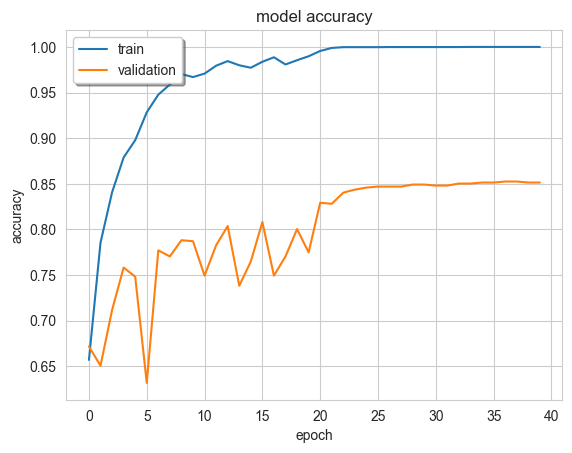

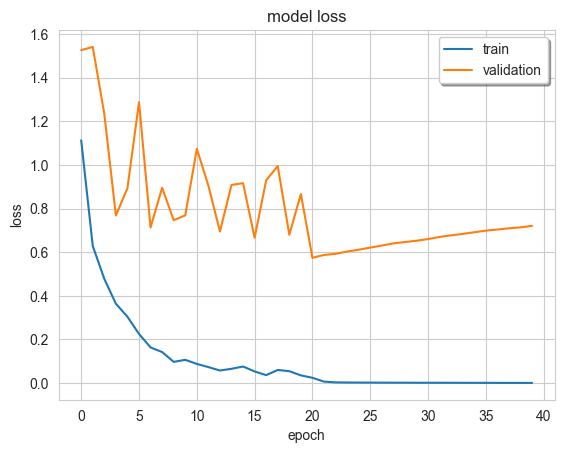

In [ ]:
# summarize history for accuracy
plt.plot(historyXcept.history['accuracy'])
plt.plot(historyXcept.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left', shadow = True)
plt.show()
# summarize history for loss
plt.plot(historyXcept.history['loss'])
plt.plot(historyXcept.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='best', shadow = True)
plt.show()

In [ ]:
predictions=model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 455ms/step


In [ ]:
# Convert predicted values from an array to a Dataframe and round up to 4 decimal place
# For each row there are predicted % for each of the classes 0 t0 6
pred = np.around(pd.DataFrame(predictions), 4)
pred

,0,1,2,3,4,5,6
0,0.9896,0.0081,0.0008,0.0005,0.0005,0.0003,0.0003
1,0.9923,0.0020,0.0024,0.0008,0.0008,0.0008,0.0009
2,0.9968,0.0009,0.0009,0.0004,0.0003,0.0004,0.0004
3,0.9970,0.0011,0.0005,0.0005,0.0003,0.0003,0.0004
4,0.9948,0.0007,0.0010,0.0008,0.0007,0.0009,0.0011
...,...,...,...,...,...,...,...
997,0.1050,0.8717,0.0160,0.0008,0.0054,0.0005,0.0006
998,0.9813,0.0146,0.0015,0.0007,0.0007,0.0007,0.0006
999,0.9944,0.0007,0.0011,0.0008,0.0009,0.0009,0.0013
1000,0.0004,0.0000,0.0001,0.9993,0.0001,0.0000,0.0000


In [ ]:
# Obtain the indice of the maximum value for each row
y_pred = np.argmax(predictions, axis = 1)
y_pred


array([0, 0, 0, ..., 0, 3, 2], dtype=int64)

In [ ]:
# Create the confusion matrix
confusion_matrix(y_pred, y_idtest)

array([[619,  31,  21,   1,   0,   1,   1],
       [ 20,  72,  11,   3,   2,   0,   1],
       [ 20,   8,  66,   3,   5,   1,   0],
       [  8,   0,   7,  42,   5,   0,   2],
       [  0,   0,   4,   1,  21,   0,   0],
       [  2,   0,   0,   0,   0,  12,   0],
       [  2,   0,   1,   1,   0,   0,   8]], dtype=int64)

In [ ]:
CMatrix = pd.DataFrame(confusion_matrix(y_pred, y_idtest), columns=lesion_names, index =lesion_names)


In [ ]:
CMatrix


,Melanocytic nevi,Melanoma,Benign keratosis-like lesions,Basal cell carcinoma,Actinic keratoses,Vascular lesions,Dermatofibroma
Melanocytic nevi,619,31,21,1,0,1,1
Melanoma,20,72,11,3,2,0,1
Benign keratosis-like lesions,20,8,66,3,5,1,0
Basal cell carcinoma,8,0,7,42,5,0,2
Actinic keratoses,0,0,4,1,21,0,0
Vascular lesions,2,0,0,0,0,12,0
Dermatofibroma,2,0,1,1,0,0,8


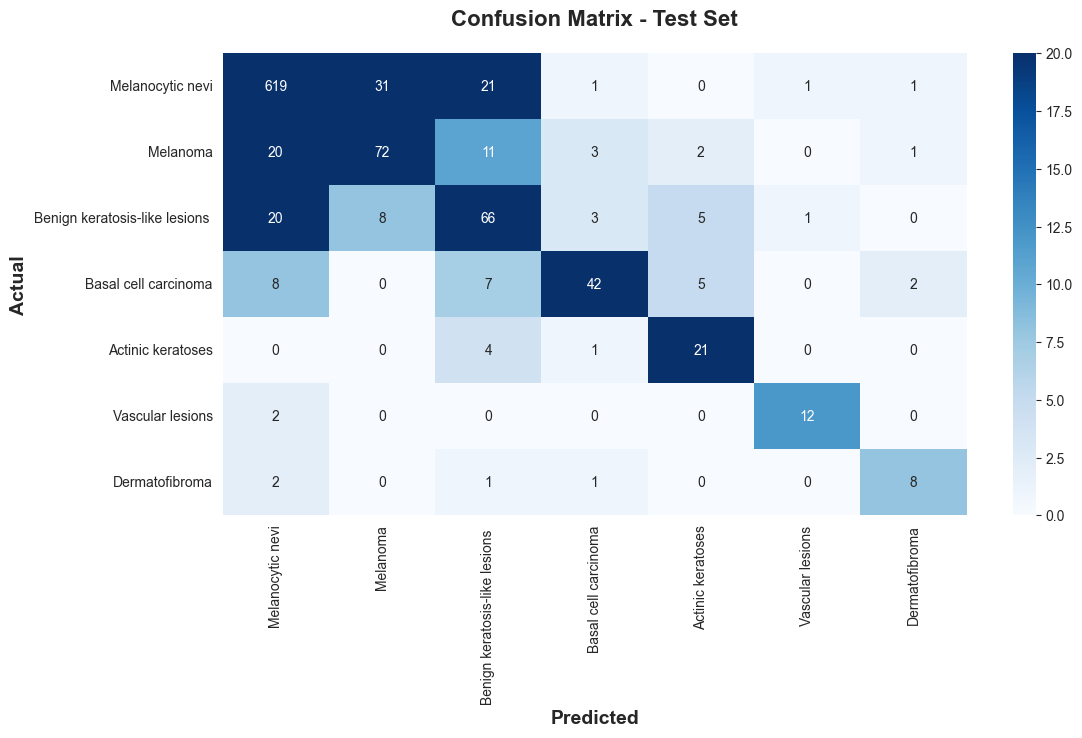

In [ ]:
# View the heatmap of the confusion matrix
plt.figure(figsize=(12, 6))
ax = sns.heatmap(CMatrix, annot = True, fmt = 'g' ,vmin = 0, vmax = 20,cmap = 'Blues')
ax.set_xlabel('Predicted',fontsize = 14,weight = 'bold')
ax.set_xticklabels(ax.get_xticklabels(),rotation =90);
ax.set_ylabel('Actual',fontsize = 14,weight = 'bold')
ax.set_title('Confusion Matrix - Test Set',fontsize = 16,weight = 'bold',pad=20);

In [ ]:
# Determine the accuracy score of the model
accuracy_score(y_pred,y_idtest)


0.8383233532934131

In [ ]:
print(classification_report(y_idtest,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       671
           1       0.66      0.65      0.65       111
           2       0.64      0.60      0.62       110
           3       0.66      0.82      0.73        51
           4       0.81      0.64      0.71        33
           5       0.86      0.86      0.86        14
           6       0.67      0.67      0.67        12

    accuracy                           0.84      1002
   macro avg       0.74      0.74      0.74      1002
weighted avg       0.84      0.84      0.84      1002



In [ ]:
# Show the accuracy of the model by class for each of the lesion in the dataset
class_accuracy = []

for i in range(7):
    acc_parz = round(np.mean(y_idtest[y_idtest == i] == y_pred[y_idtest == i]),2)
    lab_name = lesion_names[i]
    print('The Model accuracy for ',lab_name,'=',acc_parz*100)
    class_accuracy.append(acc_parz)


The Model accuracy for  Melanocytic nevi = 92.0
The Model accuracy for  Melanoma = 65.0
The Model accuracy for  Benign keratosis-like lesions  = 60.0
The Model accuracy for  Basal cell carcinoma = 82.0
The Model accuracy for  Actinic keratoses = 64.0
The Model accuracy for  Vascular lesions = 86.0
The Model accuracy for  Dermatofibroma = 67.0


In [ ]:
# Get the tabulated visualization of the Model's accuracy for each lesion
acc_tab = pd.DataFrame(list(zip(lesion_ID_dict, class_accuracy)))
acc_tab.columns = ["Lesion", "Accuracy"]
acc_tab

,Lesion,Accuracy
0,nv,0.92
1,mel,0.65
2,bkl,0.60
3,bcc,0.82
4,akiec,0.64
5,vasc,0.86
6,df,0.67


In [ ]:
x_test

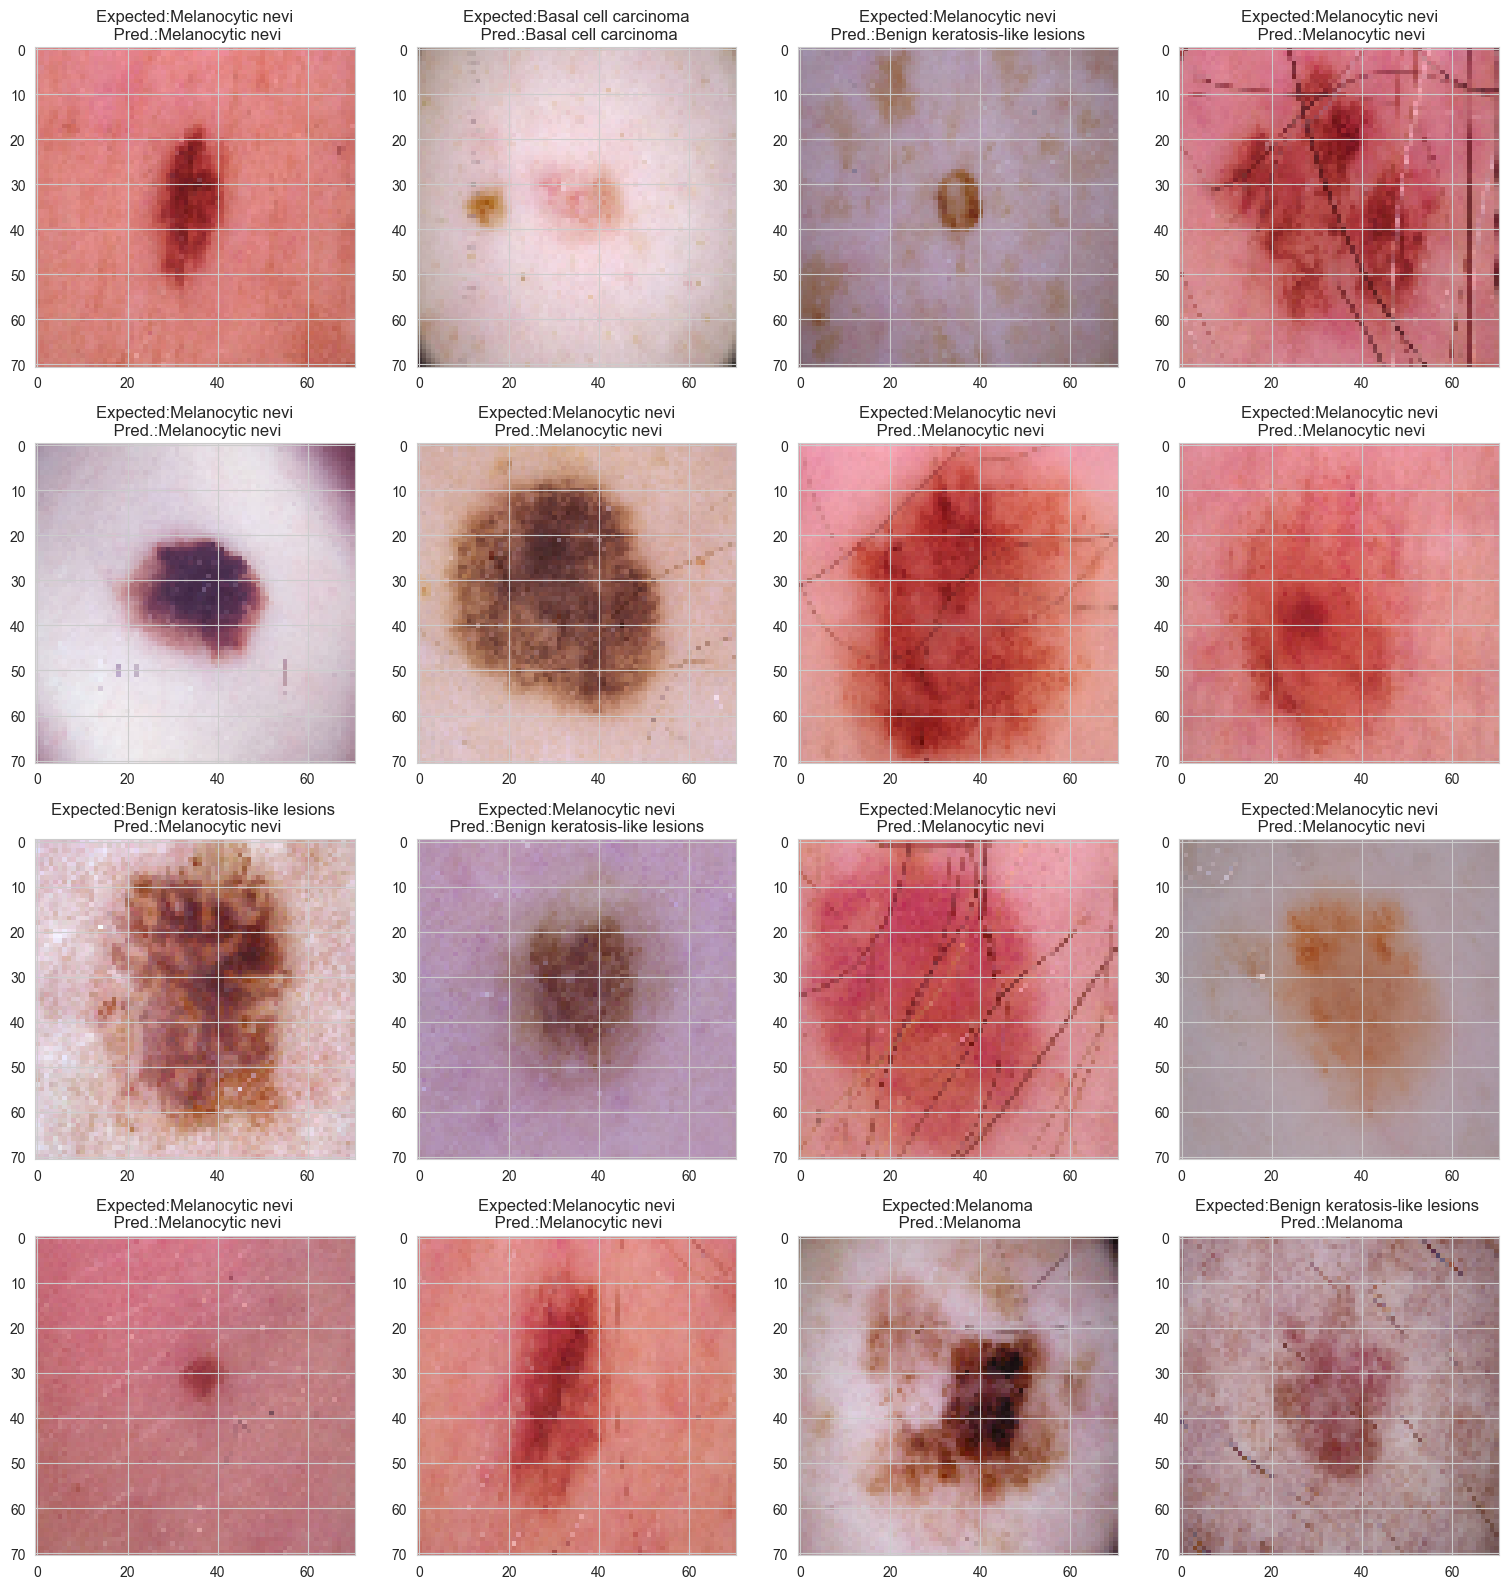

In [ ]:
# Show the Image plot along side the Label for Expected and Predicted lesion.
plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    index = i+100
    plt.imshow(x_test[index,:,:,::-1])
    label_exp = lesion_names[y_idtest[index]]  #expected label
    label_pred = lesion_names[y_pred[index]]  #predicted label
    #label_pred_prob = round(np.max(y_pred_prob[index])*100)
    plt.title('Expected:'+str(label_exp)+'\n Pred.:'+str(label_pred))
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('final_figure.png',dpi=300)
plt.show()

In [ ]:
from keras.models import load_model

# Load your trained Keras model
model = load_model(r"C:\Users\jprup\Desktop\PROJECTS\BE MPR\lavin.keras")

# Filepath for saving the model in H5 format
filepath = r"C:\Users\jprup\Desktop\PROJECTS\BE MPR\lavin.h5"

# Save the model to H5 format
model.save(filepath)

print("Model saved to", filepath)


Model saved to C:\Users\jprup\Desktop\PROJECTS\BE MPR\lavin.h5
